In [ ]:
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout

In [ ]:
from tensorflow.keras.applications import ResNet50,EfficientNetB0,VGG16,inception_v3

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/quantum_thyroid/sorted"  # Path to your dataset

In [ ]:
# Original Image + ResNet Classification
import cv2
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set random seeds for reproducibility

# Function to load original images
def load_original_images(data_dir, target_size=(224, 224)):
    """Load X-ray dataset from directory structure"""

    IMG_SIZE = (224, 224)  # Same size used in quantum pipeline
    classes = ['0','2','3','4a','4b','4c','5']
    images, labels = [],[]
    for label in classes:
        class_dir = os.path.join(data_dir, str(label))
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, IMG_SIZE) / 255.0
            img = np.stack([img] * 3, axis=-1)
            images.append(img)
            labels.append(label)

    x_data = np.array(images)
    y_data = np.array(labels)
    return x_data,y_data

# Load all images

X,y = load_original_images(DATASET_DIR, target_size=(224, 224))

# # Get the images for training and testing using the same indices
# X_train = all_images[train_indices]
# X_test = all_images[test_indices]
# y_train = train_labels
# y_test = test_labels

# print(y_train)
# print(f"Training set: {X_train.shape}, Labels: {y_train.shape}")
# print(f"Testing set: {X_test.shape}, Labels: {y_test.shape}")


KeyboardInterrupt: 

In [ ]:
map = {
'0': 0,
'2': 0,
'3': 0,
'4a': 1,
'4b': 1,
'4c': 1,
'5': 1
}
y = np.array([map[label] for label in y])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(658, 224, 224, 3)
Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 29s 417ms/step - accuracy: 0.5620 - auc_2: 0.5404 - loss: 0.7302 - val_accuracy: 0.4848 - val_auc_2: 0.4580 - val_loss: 0.8305 - learning_rate: 1.0000e-04
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6399 - auc_2: 0.6685 - loss: 0.6461 - val_accuracy: 0.4848 - val_auc_2: 0.5410 - val_loss: 0.8936 - learning_rate: 1.0000e-04
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6904 - auc_2: 0.7220 - loss: 0.6074
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6899 - auc_2: 0.7223 - loss: 0.6073 - val_accuracy: 0.4848 - val_auc_2: 0.6226 - val_loss: 0.9861 - learning_rate: 1.0000e-04
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7147 - auc_2: 0.7672 - loss: 0.5768 - val_accuracy: 0.4848 - val_auc_2: 0.6530 - val_loss: 1.2128 - learning_rate: 5.0000e-05
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/ste

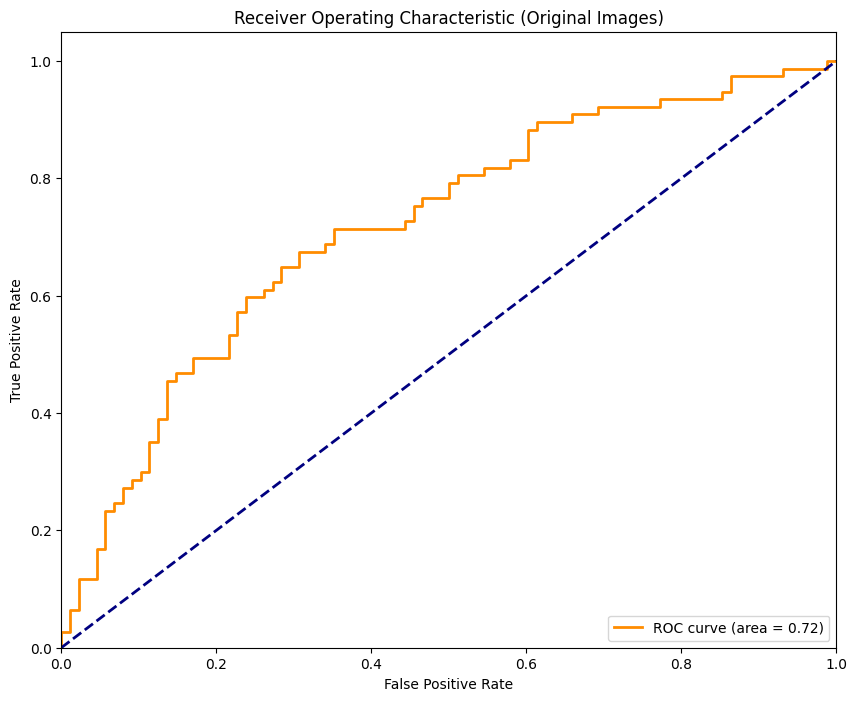

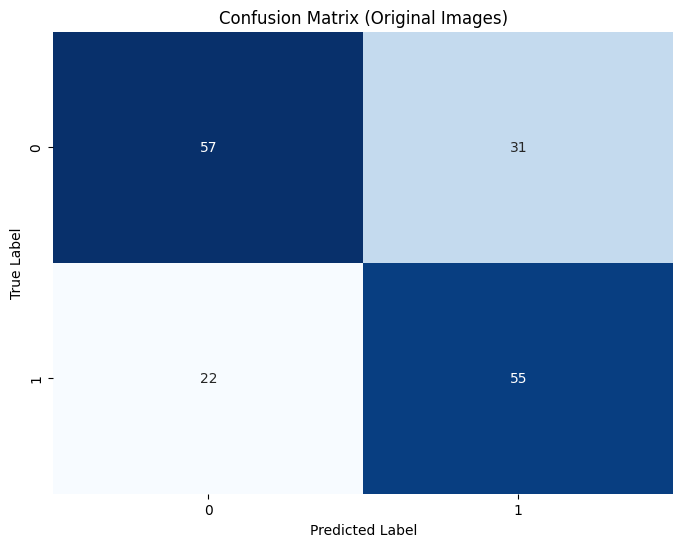


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        88
           1       0.64      0.71      0.67        77

    accuracy                           0.68       165
   macro avg       0.68      0.68      0.68       165
weighted avg       0.68      0.68      0.68       165

Test accuracy: 0.6788
Precision: 0.6395
Recall (Sensitivity): 0.7143
F1 Score: 0.6748
All results saved to: /content/drive/MyDrive/resnet_results_noquantum


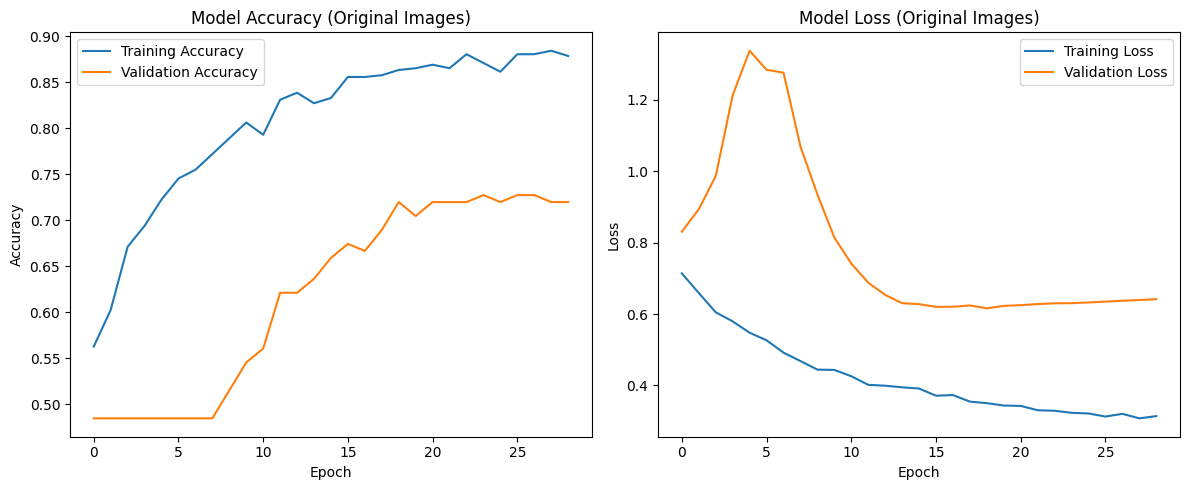

(658, 224, 224, 3)
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 55s 854ms/step - accuracy: 0.4798 - auc_3: 0.4997 - loss: 0.7051 - val_accuracy: 0.5606 - val_auc_3: 0.5000 - val_loss: 0.6863 - learning_rate: 1.0000e-04
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.4383 - auc_3: 0.4355 - loss: 0.7246 - val_accuracy: 0.5606 - val_auc_3: 0.5538 - val_loss: 0.6864 - learning_rate: 1.0000e-04
Epoch 3/50
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4867 - auc_3: 0.5006 - loss: 0.7011
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4882 - auc_3: 0.5020 - loss: 0.7008 - val_accuracy: 0.5606 - val_auc_3: 0.5000 - val_loss: 0.6907 - learning_rate: 1.0000e-04
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4860 - auc_3: 0.4697 - loss: 0.7045 - val_accuracy: 0.4394 - val_auc_3: 0.5000 - val_loss: 0.6958 - learning_rate: 5.0000e-

6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


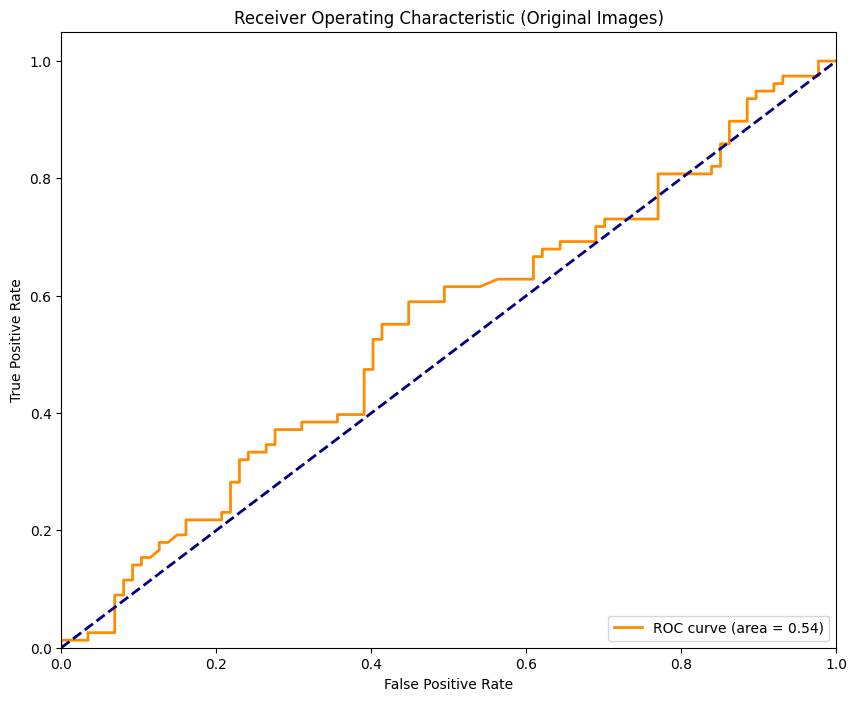

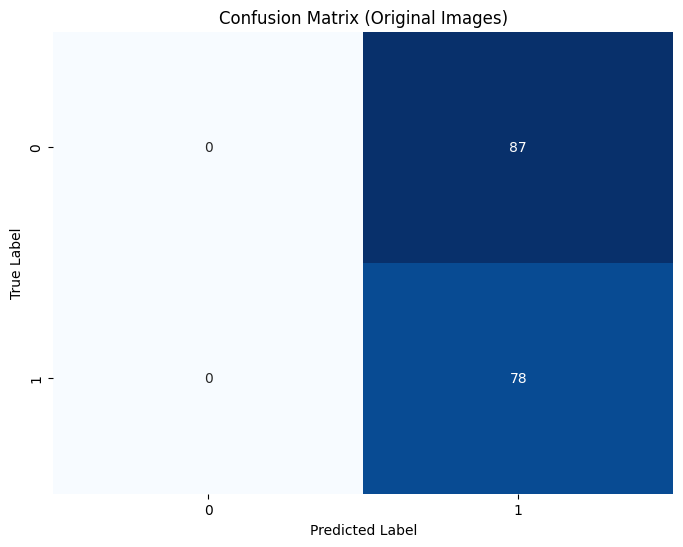


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.47      1.00      0.64        78

    accuracy                           0.47       165
   macro avg       0.24      0.50      0.32       165
weighted avg       0.22      0.47      0.30       165

Test accuracy: 0.4727
Precision: 0.4727
Recall (Sensitivity): 1.0000
F1 Score: 0.6420
All results saved to: /content/drive/MyDrive/efficientnet_results_noquantum


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


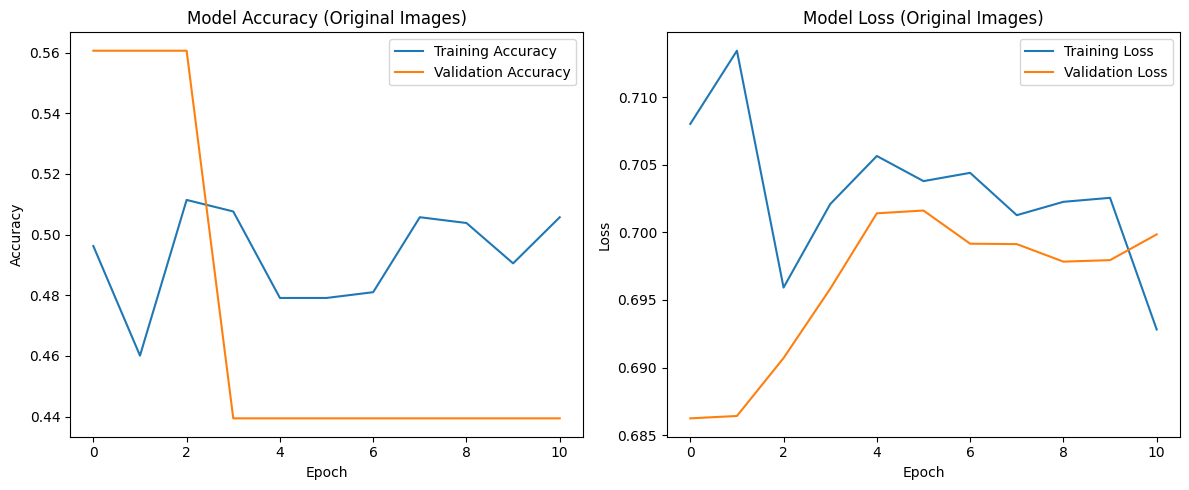

(658, 224, 224, 3)
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5162 - auc_4: 0.5277 - loss: 0.7457 - val_accuracy: 0.4545 - val_auc_4: 0.5000 - val_loss: 0.6950 - learning_rate: 1.0000e-04
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 236ms/step - accuracy: 0.4741 - auc_4: 0.4526 - loss: 0.6956 - val_accuracy: 0.5455 - val_auc_4: 0.5000 - val_loss: 0.6930 - learning_rate: 1.0000e-04
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - accuracy: 0.4989 - auc_4: 0.5000 - loss: 0.6932 - val_accuracy: 0.5455 - val_auc_4: 0.5000 - val_loss: 0.6930 - learning_rate: 1.0000e-04
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.4991 - auc_4: 0.5000 - loss: 0.6932
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.4989 - auc_4: 0.5000 - loss: 0.6932 - val_accuracy: 0.5455 - val_auc_4: 0.5000 - val_loss: 0.6930 - learning_rate: 1.0000e

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 802ms/step


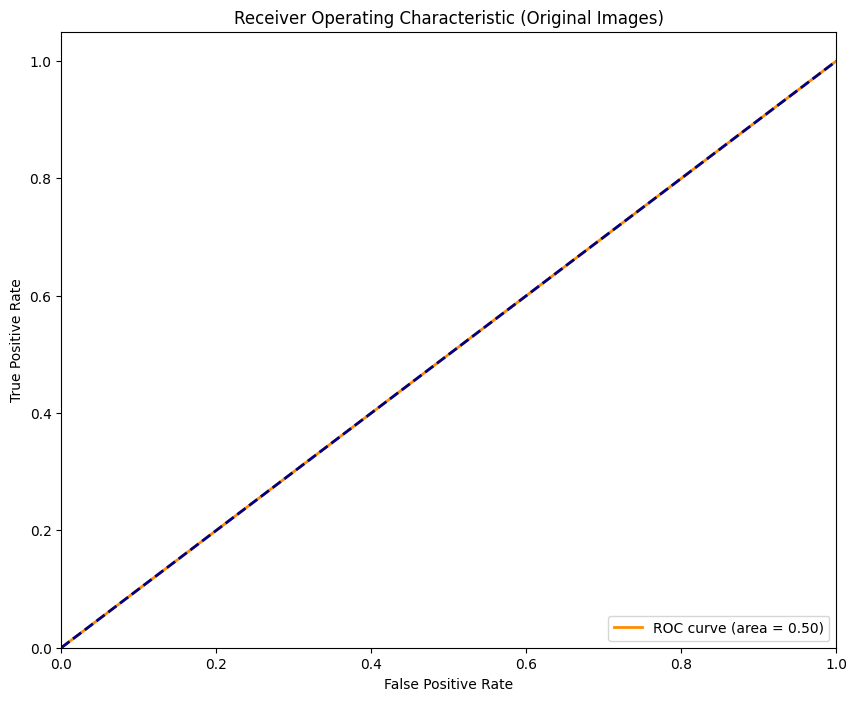

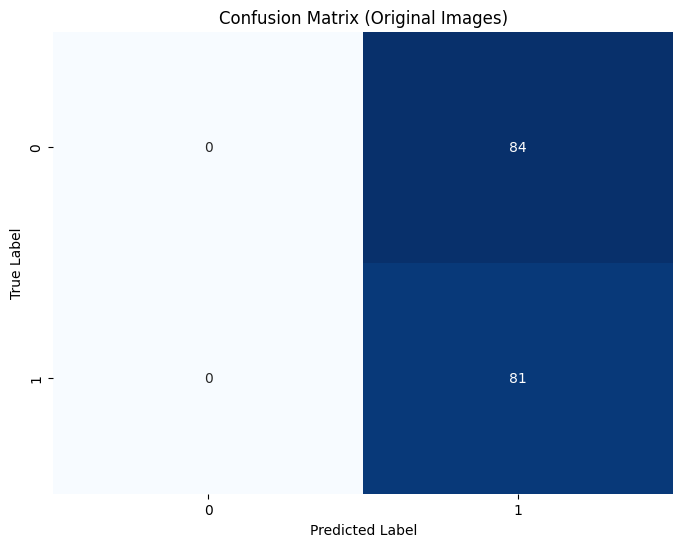


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.49      1.00      0.66        81

    accuracy                           0.49       165
   macro avg       0.25      0.50      0.33       165
weighted avg       0.24      0.49      0.32       165

Test accuracy: 0.4909
Precision: 0.4909
Recall (Sensitivity): 1.0000
F1 Score: 0.6585
All results saved to: /content/drive/MyDrive/vgg_results_noquantum


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


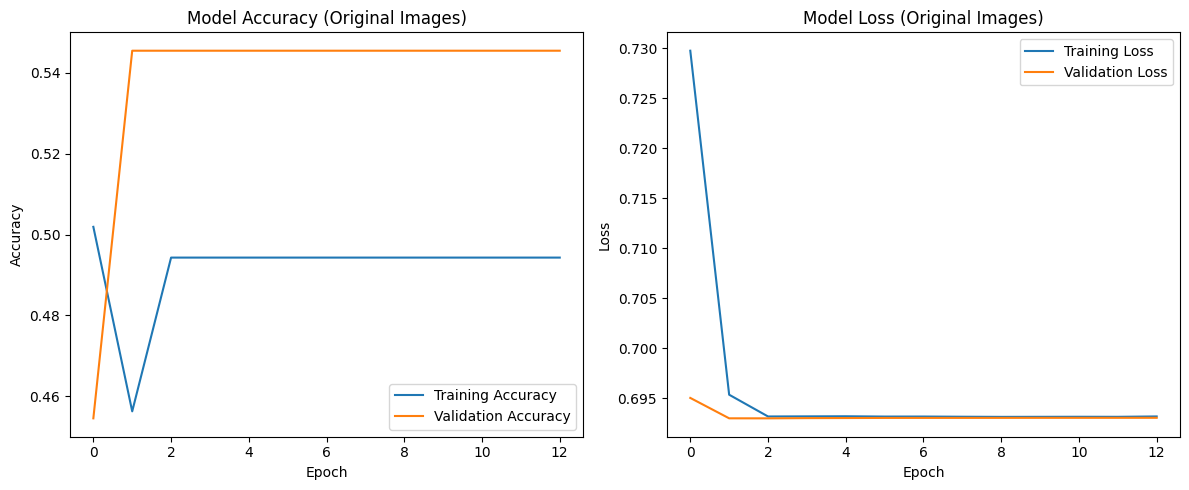

(658, 224, 224, 3)
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 712ms/step - accuracy: 0.5281 - auc_5: 0.5523 - loss: 0.7616 - val_accuracy: 0.5530 - val_auc_5: 0.7374 - val_loss: 0.6862 - learning_rate: 1.0000e-04
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6552 - auc_5: 0.7047 - loss: 0.6196 - val_accuracy: 0.6742 - val_auc_5: 0.7752 - val_loss: 0.6169 - learning_rate: 1.0000e-04
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7193 - auc_5: 0.7966 - loss: 0.5542 - val_accuracy: 0.7121 - val_auc_5: 0.7912 - val_loss: 0.5867 - learning_rate: 1.0000e-04
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7952 - auc_5: 0.8839 - loss: 0.4790 - val_accuracy: 0.6894 - val_auc_5: 0.7957 - val_loss: 0.5664 - learning_rate: 1.0000e-04
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8276 - auc_5: 0.8935 - loss: 0.4509 - val_accuracy: 0.7424 - val_auc_5: 0.8059 - val_loss: 0.5498 -

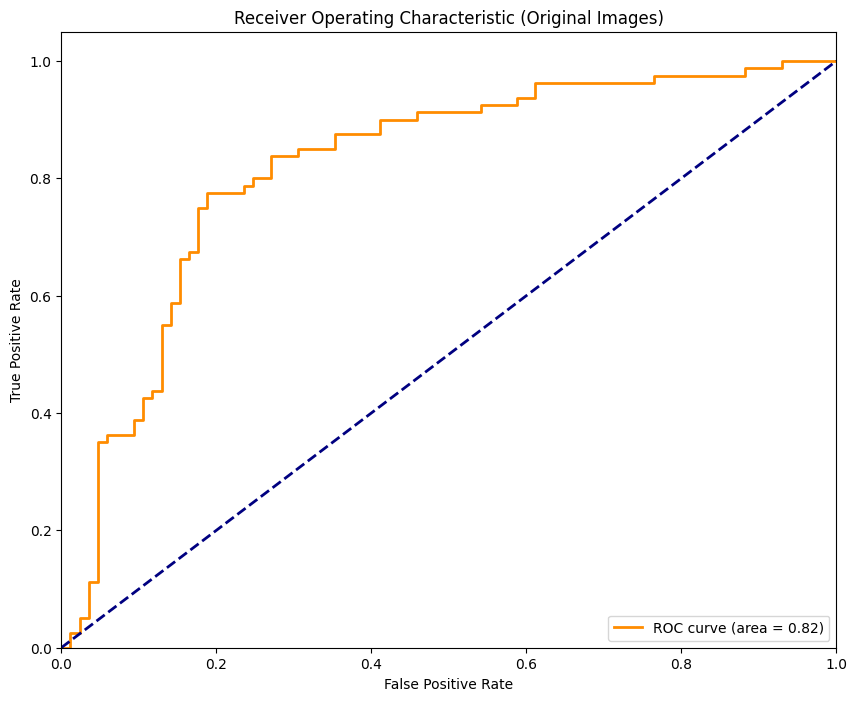

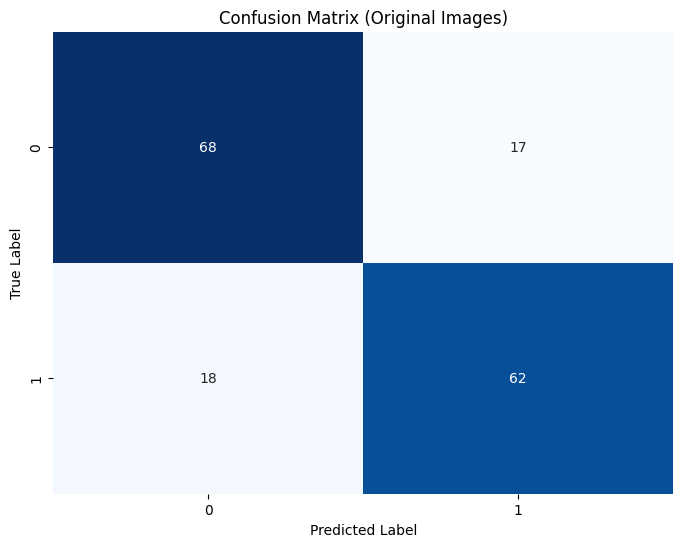


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        85
           1       0.78      0.78      0.78        80

    accuracy                           0.79       165
   macro avg       0.79      0.79      0.79       165
weighted avg       0.79      0.79      0.79       165

Test accuracy: 0.7879
Precision: 0.7848
Recall (Sensitivity): 0.7750
F1 Score: 0.7799
All results saved to: /content/drive/MyDrive/inception_results_noquantum


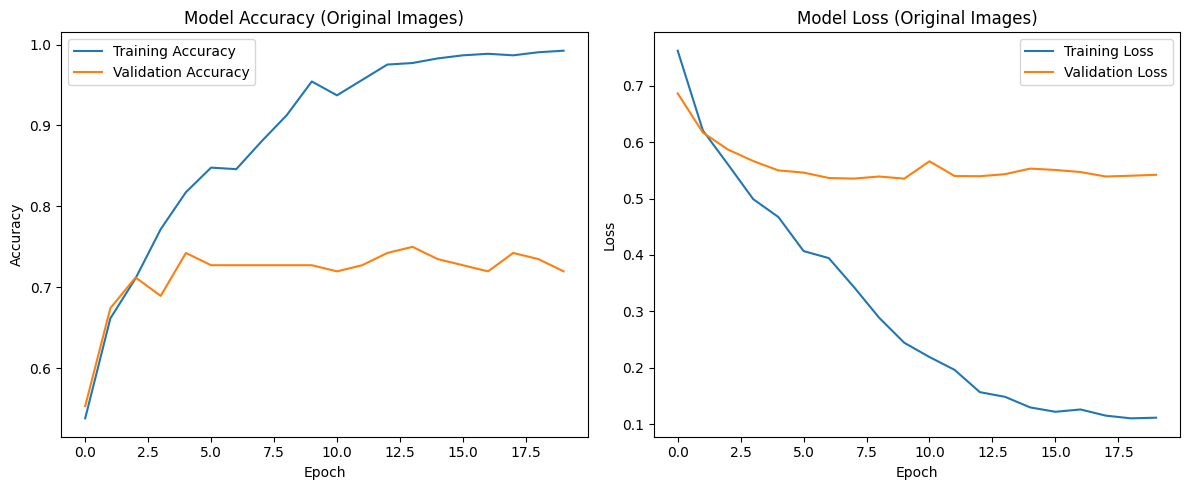

In [ ]:

# Create function to prepare original images for ResNet
def prepare_original_for_resnet(input_shape=(224, 224, 3),model_name = 'inception'):
    """
    Create a model that uses original images with ResNet50
    """
    # Input layer for grayscale images
    inputs = Input(shape=input_shape)
     # Select base model dynamically
    if model_name == 'resnet':
        model_base = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    elif model_name == 'efficientnet':
        model_base = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    elif model_name == 'vgg':
        model_base = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    else:  # default to inception
        model_base = inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

    # Option to fine-tune: unfreeze some top layers

    for layer in model_base.layers:
        layer.trainable = False

    for layer in model_base.layers[-15:]:
        layer.trainable = True

    # Connect quantum features to base model
    resnet_features = model_base(inputs)

    # Classification head
    x = GlobalAveragePooling2D()(resnet_features)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)  # Add dropout for regularization
    outputs = Dense(1, activation='sigmoid')(x)

    # Create full model
    model = Model(inputs=inputs, outputs=outputs)
    return model


# Example usage
models_to_try = ['resnet', 'efficientnet', 'vgg', 'inception']
results = {}

for model_name in models_to_try:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)
    X_train_norm = (X_train - X_train.min()) / (X_train.max() - X_train.min())
    X_test_norm = (X_test - X_test.min()) / (X_test.max() - X_test.min())
    OUTPUT_DIR = f"/content/drive/MyDrive/{model_name}_results_noquantum"
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    print(X_train_norm.shape)
    # Recreate model for each iteration
    model = prepare_original_for_resnet(model_name=model_name)

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC()])

    batch_size = 16
    epochs = 50
    # Set up callbacks for training
    early_stopping = EarlyStopping(
        restore_best_weights=True,
        patience = 10,
        verbose=1,
        monitor='val_loss',
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-6,
        verbose=1
    )
    # Train model
    history = model.fit(
        X_train_norm, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2,
        callbacks=[early_stopping, reduce_lr]
    )

    # Evaluate model
    y_pred_prob = model.predict(X_test_norm)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    #_________________________________________plot________________________________________________________
    # Calculate and plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
            label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (Original Images)')
    plt.legend(loc="lower right")
    plt.savefig(os.path.join(OUTPUT_DIR, 'roc_curve.png'))
    plt.show()

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix (Original Images)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(os.path.join(OUTPUT_DIR, 'confusion_matrix.png'))
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


    # Calculate additional metrics
    test_acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Test accuracy: {test_acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    # Save a summary of the results
    with open(os.path.join(OUTPUT_DIR, 'results_summary.txt'), 'w') as f:
        f.write(f"Original Images + ResNet Classification Results\n")
        f.write(f"==============================================\n\n")
        f.write(f"Test accuracy: {test_acc:.4f}\n")
        f.write(f"Precision: {precision:.4f}\n")
        f.write(f"Recall (Sensitivity): {recall:.4f}\n")
        f.write(f"F1 Score: {f1:.4f}\n")

    print(f"All results saved to: {OUTPUT_DIR}")


    # Plot training history
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy (Original Images)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss (Original Images)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, 'training_history.png'))
    plt.show()

# Print comparative results
for model, metrics in results.items():
    print(f"\n{model.upper()} Model Performance:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")

In [ ]:

# Create function to prepare original images for ResNet
def prepare_original_for_resnet(input_shape=(224, 224, 1)):
    """
    Create a model that uses original images with ResNet50
    """
    # Input layer for grayscale images
    inputs = Input(shape=input_shape)
    # Convert grayscale to RGB by repeating the channel 3 times
    # Use a pretrained ResNet50 without the top classification layer
    model_base = ResNet50(include_top=False, weights='imagenet',input_shape=(input_shape[0], input_shape[1], 3))
    #model_base = EfficientNetB0(include_top=False, input_shape=(input_shape[0], input_shape[1], 3),weights='imagenet')
    #model_base = VGG16(include_top=False, input_shape=(input_shape[0], input_shape[1], 3),weights='imagenet')
    #model_base = inception_v3.InceptionV3(include_top=False, input_shape=(input_shape[0], input_shape[1], 3),weights='imagenet')
    # Freeze the ResNet weights
    for layer in model_base.layers:
        layer.trainable = False

    # Pass our RGB-converted images to ResNet
    resnet_features = model_base(inputs)

    # Add classification head
    x = GlobalAveragePooling2D()(resnet_features)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the full model
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Normalize the pixel values to [0,1]
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

# Define parameters
batch_size = 16
epochs = 50

# Create and compile the model
print("Creating and compiling the model...")
model = prepare_original_for_resnet(input_shape=(224, 224, 1))
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

# Display model summary
model.summary()

early_stopping = EarlyStopping(
    patience=40,
    restore_best_weights=True,
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train the model
print("Training the model...")
history = model.fit(
    X_train_norm, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[reduce_lr,early_stopping]
)

# Evaluate the model on the test set
print("Evaluating the model...")
test_loss, test_acc, test_auc = model.evaluate(X_test_norm, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Creating and compiling the model...


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 224, 224, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Training the model...
Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 367ms/step - accuracy: 0.5099 - auc_8: 0.4969 - loss: 0.7234 - val_accuracy: 0.5455 - val_auc_8: 0.5000 - val_loss: 0.6891 - learning_rate: 1.0000e-04
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.5099 - auc_8: 0.4910 - loss: 0.6987 - val_accuracy: 0.5455 - val_auc_8: 0.5000 - val_loss: 0.6893 - learning_rate: 1.0000e-04
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4925 - auc_8: 0.4911 - loss: 0.6965 - val_accuracy: 0.5455 - val_auc_8: 0.5000 - val_loss: 0.6892 - learning_rate: 1.0000e-04
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.4925 - auc_8: 0.4899 - loss: 0.6966 - val_accuracy: 0.5455 - val_auc_8: 0.5000 - val_loss: 0.6892 - learning_rate: 1.0000e-04
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.4925 - auc_8: 0.4898 - loss: 0.6967 - val_accuracy: 0.5455 - val_auc_8: 0.5000 - val_loss: 0.6892 - learning_rate: 1.0000e-04
Epoch 6/50
33/33 ━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


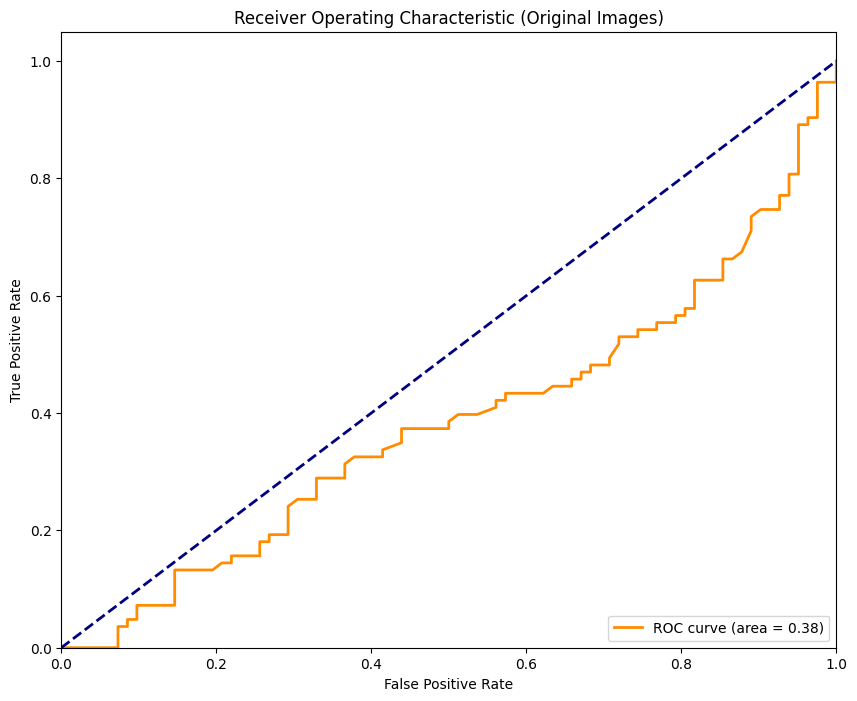

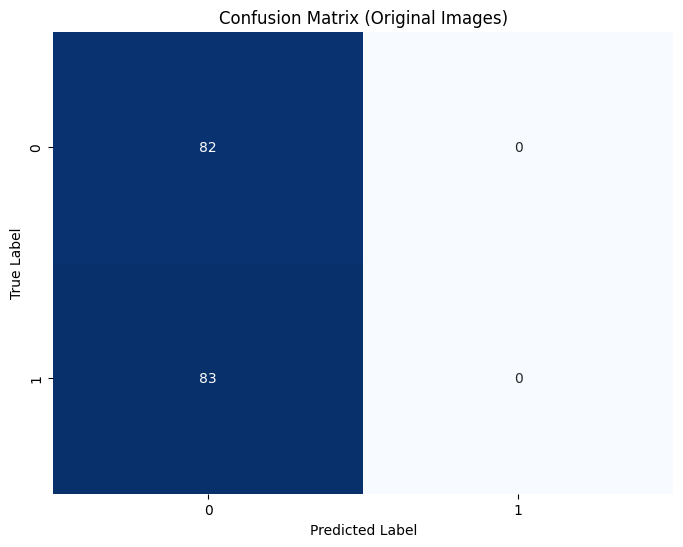


Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66        82
           1       0.00      0.00      0.00        83

    accuracy                           0.50       165
   macro avg       0.25      0.50      0.33       165
weighted avg       0.25      0.50      0.33       165



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TypeError: 'float' object is not callable

In [ ]:


# Make predictions
y_pred_prob = model.predict(X_test_norm)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate and plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Original Images)')
plt.legend(loc="lower right")
plt.savefig(os.path.join(OUTPUT_DIR, 'roc_curve.png'))
plt.show()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix (Original Images)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig(os.path.join(OUTPUT_DIR, 'confusion_matrix.png'))
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Calculate additional metrics
test_acc = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

# Save a summary of the results
with open(os.path.join(OUTPUT_DIR, 'results_summary.txt'), 'w') as f:
    f.write(f"Original Images + ResNet Classification Results\n")
    f.write(f"==============================================\n\n")
    f.write(f"Test accuracy: {test_acc:.4f}\n")
    f.write(f"Precision: {precision:.4f}\n")
    f.write(f"Recall (Sensitivity): {recall:.4f}\n")
    f.write(f"F1 Score: {f1_score:.4f}\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))

print(f"All results saved to: {OUTPUT_DIR}")



In [ ]:

# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Original Images)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Original Images)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'training_history.png'))
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


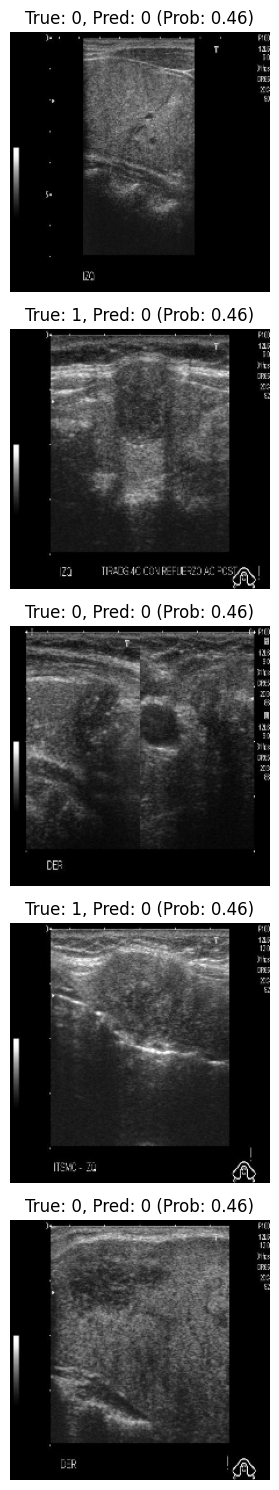

In [ ]:
# Visualize a few sample images with their predictions
def visualize_predictions(model, X_test, y_test, num_samples=5):
    """Visualize predictions for a few samples"""
    # Get random samples
    sample_indices = np.random.choice(len(X_test), num_samples, replace=False)
    X_samples = X_test[sample_indices]
    y_samples = y_test[sample_indices]

    # Get predictions
    y_pred_prob = model.predict(X_samples)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    # Plot
    plt.figure(figsize=(15, num_samples * 3))
    for i in range(num_samples):
        plt.subplot(num_samples, 1, i+1)
        plt.imshow(X_samples[i, :, :, 0], cmap='gray')
        plt.title(f"True: {y_samples[i]}, Pred: {y_pred[i]} (Prob: {y_pred_prob[i][0]:.2f})")
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, 'prediction_visualization.png'))
    plt.show()

# Visualize some predictions
visualize_predictions(model, X_test_norm, y_test)

In [ ]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])